<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1* 
Mason

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [1]:
import matplotlib.pyplot as plt
from collections import Counter


In [2]:
# rewrite count funciton

def count(docs):
 
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())

    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x/ total_docs)

    return wc.sort_values(by='rank')

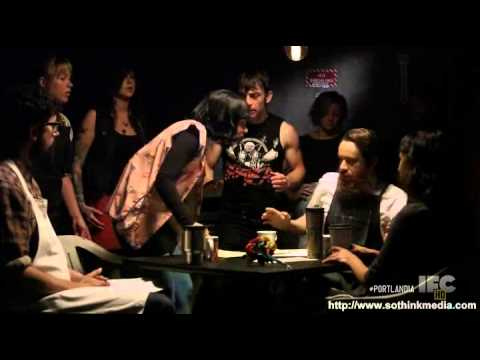

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [4]:
%pwd

'/Users/masonnystrom/Desktop/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [6]:
shops.describe()

,coffee_shop_name,full_review_text,star_rating
count,7616,7616,7616
unique,79,6915,5
top,Epoch Coffee,11/16/2016 The greeting of an atmosphere it f...,5.0 star rating
freq,400,4,3780


In [ ]:
# splice data
# shops['date'] = shops['full_review_text'].apply(lambda x: x.split()[0])
# shops['review'] = shops['full_review_text'].apply(lambda x: " ".join(x.split()[1:]))
# shops['rating'] = shops['star_rating'].apply(lambda x: x[:4]).astype('float')

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [7]:
# make tokens
import spacy
from spacy.tokenizer import Tokenizer
#model
nlp = spacy.load("en_core_web_lg")

#tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [8]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ', 'come', 'check', 'try', 'little', 'drink', 'get', 'Austin', 'coffee', 'place', ' , ', '/', "it's", "its", "it", "i", "I", "the", "this", "check-in", 1, "1"])

In [19]:
# make basic tokens
def get_lemmas(text):
    
    lemmas = []
    
    for doc in nlp.pipe(shops['review'], batch_size =500):

    d_lems = []
    # creating tokens
        for token in doc:
            if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON') and (token.text.lower() not in STOP_WORDS):
                d_lems.append(token.lemma_)

    return lemmas.append(d_lens)

In [20]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [21]:
shops['lemmas'].head(20)

0     [11/25/2016, Love, love, love, atmosphere, cor...
1     [12/2/2016, list, Date, Night, Austin, Ambianc...
2     [11/30/2016, list, Brunch, Spots, love, eclect...
3     [11/25/2016, cool, decor, good, drink, nice, s...
4     [12/3/2016, locate, Northcross, mall, shopping...
5     [11/20/2016, cute, cafe, think, moment, step, ...
6     [10/27/2016, 2, in, list, Nuptial, Bliss, Ande...
7     [11/2/2016, 2, in, Love, 5, star, cleanliness,...
8     [10/25/2016, ok, let, approach, pro, music, Se...
9     [11/10/2016, 3, in, show, social, medium, day,...
10    [10/22/2016, list, Americano, average, cute, s...
11    [11/20/2016, store, a+, decoration, honestly, ...
12    [11/17/2016, list, 2016, time, Charm, Factory,...
13    [12/5/2016, cute, cafe, drive, time, notice, t...
14    [11/13/2016, beautiful, eccentric, shop, libra...
15    [11/9/2016, list, Search, Fantastic, want, wri...
16    [11/6/2016, love, atmosphere, frequent, shop, ...
17    [10/25/2016, video, review, youtube.com/wa

In [12]:
wc = count(shops['lemmas'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
157,good,3576,5341,1.0,0.015547,0.015547,0.469538
111,great,2839,3911,2.0,0.011384,0.026931,0.372768
155,like,2273,3379,3.0,0.009836,0.036766,0.298451
496,time,1764,2384,4.0,0.006939,0.043706,0.231618
21,love,1769,2298,5.0,0.006689,0.050395,0.232274


In [13]:
wc.tail()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
18432,windowed,1,1,18434.0,0.000003,0.999988,0.000131
18433,actuality,1,1,18435.0,0.000003,0.999991,0.000131
18434,crass,1,1,18436.0,0.000003,0.999994,0.000131
18437,digestion,1,1,18437.0,0.000003,0.999997,0.000131
18436,Moroccan,1,1,18438.0,0.000003,1.000000,0.000131


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


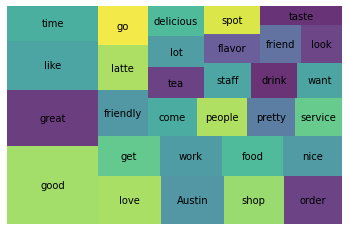

In [14]:
import squarify
wc_top20 = wc[wc['rank'] <=30]
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

